# Decision Tree Classifier (titanic)
### Author : MD. Mehedi Hassan Galib
### Date : 03 August, 2020

<br/>

<br/>

# Loading libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import metrics
import seaborn as sns

<br/>
<br/> 

## Getting dataset and Reconnaissance

In [2]:
df = pd.read_csv('C:/Users/Mehedi Hassan Galib/Desktop/Python/datas/tt.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.drop(df[['PassengerId','Name','SibSp','Parch','Ticket','Cabin']], axis = 1, inplace = True)
df.head()

,Survived,Pclass,Sex,Age,Fare,Embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


<br/>
<br/> 

## Converting to dummy variable

In [4]:
df2 = pd.get_dummies(df, columns = ['Sex','Embarked'], drop_first = True)
df2.head()

,Survived,Pclass,Age,Fare,Sex_male,Embarked_Q,Embarked_S
0,0,3,22.0,7.2500,1,0,1
1,1,1,38.0,71.2833,0,0,0
2,1,3,26.0,7.9250,0,0,1
3,1,1,35.0,53.1000,0,0,1
4,0,3,35.0,8.0500,1,0,1


<br/>
<br/> 

## Handling Missing Values

In [5]:
df2.isnull().sum()

Survived        0
Pclass          0
Age           177
Fare            0
Sex_male        0
Embarked_Q      0
Embarked_S      0
dtype: int64

In [6]:
df3 = df2.fillna(df.mean())

In [7]:
df3.isnull().sum()

Survived      0
Pclass        0
Age           0
Fare          0
Sex_male      0
Embarked_Q    0
Embarked_S    0
dtype: int64

<br/>
<br/>

## Converting to DataFrame

In [8]:
X = pd.DataFrame(df3[['Pclass','Age','Fare','Sex_male','Embarked_Q','Embarked_S']])
y = pd.DataFrame(df3.Survived)

<br/>
<br/>

## Splitting into Train and Test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 45, stratify =y)

<br/>
<br/>

## Model build up

In [10]:
cf = DecisionTreeClassifier(max_depth = 2, random_state = 45)
model = cf.fit(X_train, y_train)

<br/>
<br/>

## Prediction

In [11]:
y_pred = cf.predict(X_test)
y_pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0], dtype=int64)

<br/>
<br/>

## Model accuracy (R-squared value)

In [12]:
metrics.accuracy_score(y_test, y_pred)

0.7877094972067039

<br/>
<br/>

## Confusion matrix

In [13]:
con_mat = metrics.confusion_matrix(y_test, y_pred)
con_mat

array([[98, 12],
       [26, 43]], dtype=int64)

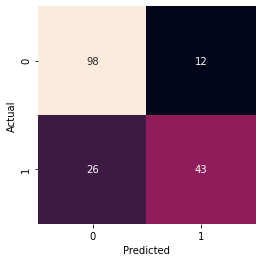

In [14]:
sns.heatmap(con_mat, square = True, annot = True, fmt = 'd', cbar = False)
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

<br/>
<br/>

## Decision tree

[Text(697.5, 755.0, 'Sex_male <= 0.5\ngini = 0.473\nsamples = 712\nvalue = [439, 273]\nclass = Unsurvived'),
 Text(348.75, 453.0, 'Pclass <= 2.5\ngini = 0.391\nsamples = 259\nvalue = [69, 190]\nclass = survived'),
 Text(174.375, 151.0, 'gini = 0.122\nsamples = 138\nvalue = [9, 129]\nclass = survived'),
 Text(523.125, 151.0, 'gini = 0.5\nsamples = 121\nvalue = [60, 61]\nclass = survived'),
 Text(1046.25, 453.0, 'Pclass <= 1.5\ngini = 0.299\nsamples = 453\nvalue = [370, 83]\nclass = Unsurvived'),
 Text(871.875, 151.0, 'gini = 0.475\nsamples = 93\nvalue = [57, 36]\nclass = Unsurvived'),
 Text(1220.625, 151.0, 'gini = 0.227\nsamples = 360\nvalue = [313, 47]\nclass = Unsurvived')]

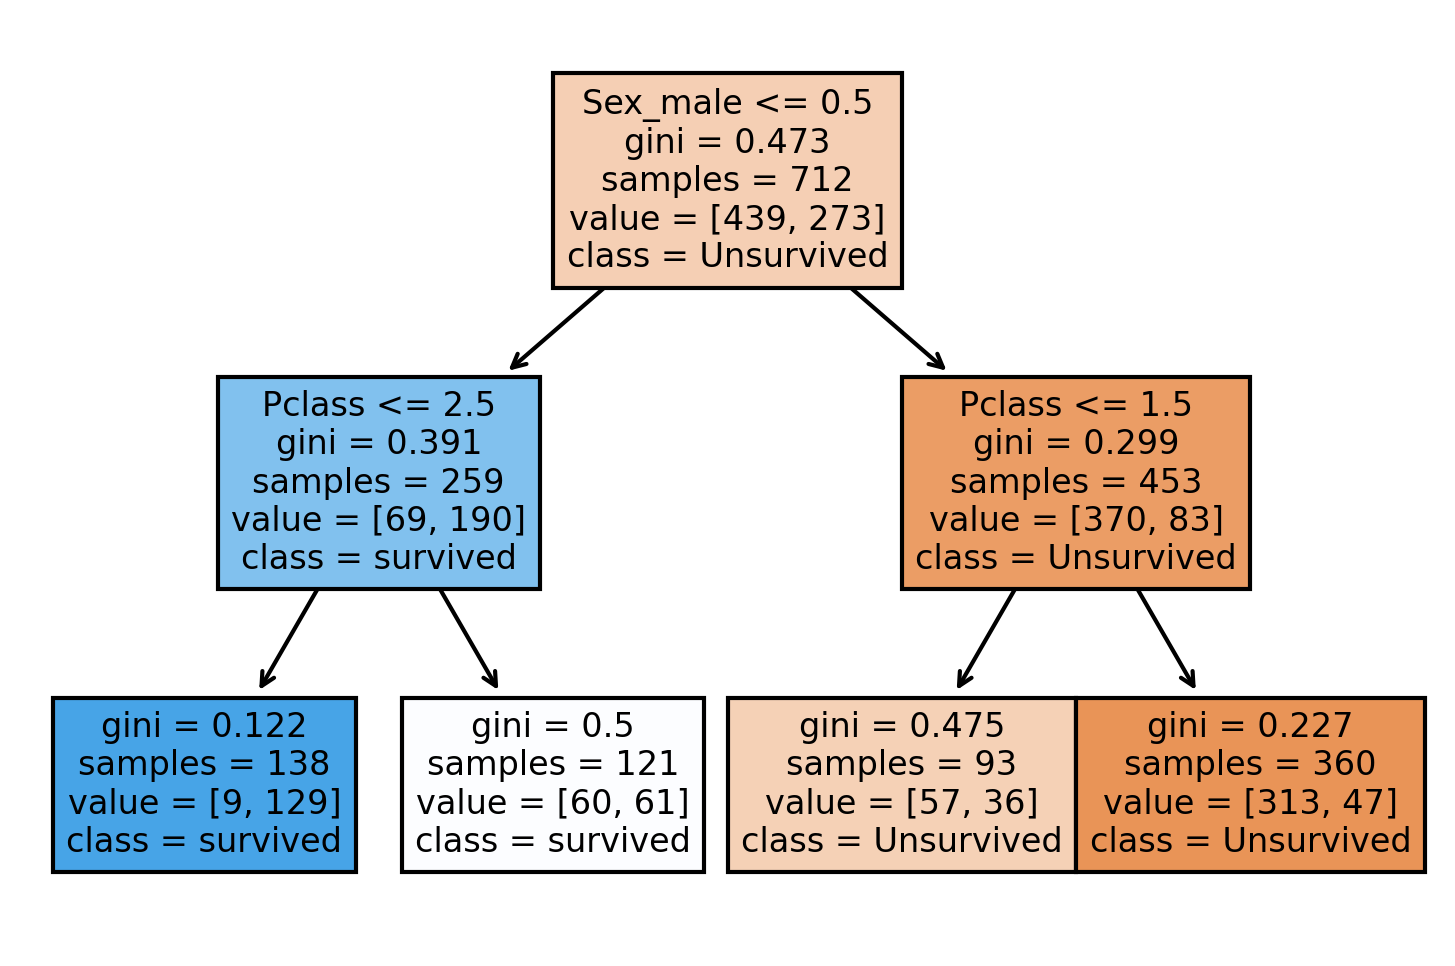

In [15]:
fn=['Pclass','Age','Fare','Sex_male','Embarked_Q','Embarked_S']
cn=['Unsurvived', 'survived']

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (6,4), dpi=300)
tree.plot_tree(cf,
               feature_names = fn, 
               class_names=cn,
               filled = True)